# Solid Waste Management

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw= pd.read_csv('Municipal Solid Waste Management.csv')

In [3]:
df_backup=df_raw.copy()

In [4]:
df=df_raw.copy()

In [5]:
df.head()

,Timestamp,Username,Locality,Highest Qualification,Occupation,Type of Residence,Number of people,Annual Income,Approximate Weight of waste generated per Day,Type of Solid waste( Select as many as possible),Frequency of Disposal,Mode of Disposal,Number of Bins in the Vicinity
0,2022/08/17 1:45:52 PM GMT+5:30,lohithvegesna@gmail.com,Miyapur,Btech,Student,Apartment,2-3 Members,Less than 5 lakh per annum,1-2 Kg,Kitchen waste,Daily,Door to door collection,1
1,2022/08/17 1:53:09 PM GMT+5:30,19211a0556@bvrit.ac.in,Miyapur,BTech,Student,Apartment,4-5 Members,5-7 lakh per annum,Less than 1 kg,Kitchen waste,Daily,Mobile Collection Vehicle,1
2,2022/08/17 1:56:11 PM GMT+5:30,19211a05e0@bvrit.ac.in,Miyapur,Intermediate,Student,Apartment,4-5 Members,NaN,Less than 1 kg,Kitchen waste,Daily,Nearby dump yard,2
3,2022/08/17 2:01:55 PM GMT+5:30,srikarsamudrala2001@gmail.com,Miyapur,B.Tech,Student,Gated Community,4-5 Members,More than 10 lakh per annum,1-2 Kg,Kitchen waste,Alternate day,Mobile Collection Vehicle,More than 2
4,2022/08/17 2:02:55 PM GMT+5:30,nravisankar4455@gmail.com,Miyapur,BTECH,Student,Apartment,2-3 Members,More than 10 lakh per annum,Less than 1 kg,Kitchen waste,Daily,Door to door collection,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Timestamp                                         360 non-null    object
 1   Username                                          360 non-null    object
 2   Locality                                          360 non-null    object
 3   Highest Qualification                             360 non-null    object
 4   Occupation                                        360 non-null    object
 5   Type of Residence                                 360 non-null    object
 6   Number of people                                  360 non-null    object
 7   Annual Income                                     349 non-null    object
 8   Approximate Weight of waste  generated per Day    360 non-null    object
 9   Type of Solid waste( Select as m

In [7]:
df=df.drop(['Timestamp','Username','Highest Qualification','Occupation','Locality'],axis=1)

In [8]:
df.head()

,Type of Residence,Number of people,Annual Income,Approximate Weight of waste generated per Day,Type of Solid waste( Select as many as possible),Frequency of Disposal,Mode of Disposal,Number of Bins in the Vicinity
0,Apartment,2-3 Members,Less than 5 lakh per annum,1-2 Kg,Kitchen waste,Daily,Door to door collection,1
1,Apartment,4-5 Members,5-7 lakh per annum,Less than 1 kg,Kitchen waste,Daily,Mobile Collection Vehicle,1
2,Apartment,4-5 Members,NaN,Less than 1 kg,Kitchen waste,Daily,Nearby dump yard,2
3,Gated Community,4-5 Members,More than 10 lakh per annum,1-2 Kg,Kitchen waste,Alternate day,Mobile Collection Vehicle,More than 2
4,Apartment,2-3 Members,More than 10 lakh per annum,Less than 1 kg,Kitchen waste,Daily,Door to door collection,1


## Data Processing

In [9]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

Type of Residence                                   0.000000
Number of people                                    0.000000
Annual Income                                       3.055556
Approximate Weight of waste  generated per Day      0.000000
Type of Solid waste( Select as many as possible)    0.000000
Frequency of Disposal                               0.000000
Mode of Disposal                                    0.000000
Number of Bins in the Vicinity                      0.000000
dtype: float64

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Annual Income']=imp.fit_transform(df[['Annual Income']])

In [11]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

Type of Residence                                   0.0
Number of people                                    0.0
Annual Income                                       0.0
Approximate Weight of waste  generated per Day      0.0
Type of Solid waste( Select as many as possible)    0.0
Frequency of Disposal                               0.0
Mode of Disposal                                    0.0
Number of Bins in the Vicinity                      0.0
dtype: float64

In [12]:
columns=df.columns
columns

Index(['Type of Residence', 'Number of people', 'Annual Income',
       'Approximate Weight of waste  generated per Day',
       'Type of Solid waste( Select as many as possible)',
       'Frequency of Disposal', 'Mode of Disposal',
       'Number of Bins in the Vicinity'],
      dtype='object')

In [13]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['Type of Residence',
 'Number of people',
 'Annual Income',
 'Approximate Weight of waste  generated per Day',
 'Type of Solid waste( Select as many as possible)',
 'Frequency of Disposal',
 'Mode of Disposal',
 'Number of Bins in the Vicinity']

In [14]:

for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

Type of Residence 
--------------------
 Unique :4
--------------------
--------------------
Independent house             126
Apartment                     118
Small Community(2-3 Story)     83
Gated Community                33
Name: Type of Residence, dtype: int64 

Number of people 
--------------------
 Unique :4
--------------------
--------------------
4-5 Members    192
2-3 Members     92
More than 5     43
Single          33
Name: Number of people, dtype: int64 

Annual Income 
--------------------
 Unique :4
--------------------
--------------------
Less than 5 lakh per annum     129
7-10 lakh per annum             89
5-7 lakh per annum              85
More than 10 lakh per annum     57
Name: Annual Income, dtype: int64 

Approximate Weight of waste  generated per Day 
--------------------
 Unique :4
--------------------
--------------------
1-2 Kg            103
Less than 1 kg     94
2-4 Kg             94
4-6 kg             69
Name: Approximate Weight of waste  generated per 

In [15]:
df.drop('Type of Solid waste( Select as many as possible)',axis=1,inplace=True)

## Encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Type of Residence                               360 non-null    object
 1   Number of people                                360 non-null    object
 2   Annual Income                                   360 non-null    object
 3   Approximate Weight of waste  generated per Day  360 non-null    object
 4   Frequency of Disposal                           360 non-null    object
 5   Mode of Disposal                                360 non-null    object
 6   Number of Bins in the Vicinity                  360 non-null    object
dtypes: object(7)
memory usage: 19.8+ KB


In [17]:
df=pd.get_dummies(df,columns =['Type of Residence','Mode of Disposal','Frequency of Disposal'])

In [18]:
df['Number of people'].unique()

array(['2-3 Members', '4-5 Members', 'More than 5', 'Single'],
      dtype=object)

In [19]:
df['Number of people']=df['Number of people'].map({'2-3 Members':1, '4-5 Members':2, 'More than 5':3, 'Single':0})

In [20]:
df['Annual Income'].unique()

array(['Less than 5 lakh per annum', '5-7 lakh per annum',
       'More than 10 lakh per annum', '7-10 lakh per annum'], dtype=object)

In [21]:
df['Annual Income']=df['Annual Income'].map({'Less than 5 lakh per annum':0, '5-7 lakh per annum':1,
                                             'More than 10 lakh per annum':3, '7-10 lakh per annum':2})

In [22]:
df['Approximate Weight of waste  generated per Day'].unique()

array(['1-2 Kg', 'Less than 1 kg', '2-4 Kg', '4-6 kg'], dtype=object)

In [23]:
df['Approximate Weight of waste  generated per Day']=df['Approximate Weight of waste  generated per Day'].map(
    {'1-2 Kg':1, 'Less than 1 kg':0, '2-4 Kg':2, '4-6 kg':3})

In [24]:
df['Number of Bins in the Vicinity'].unique()

array(['1', '2', 'More than 2', '0'], dtype=object)

In [25]:
df['Number of Bins in the Vicinity']=df['Number of Bins in the Vicinity'].map(
    {'1':1, '2':2, 'More than 2':3, '0':0})

In [26]:
#df['Do you Recommend separation of waste like Dry waste & Wet waste?'].unique()

In [27]:
#df['Do you Recommend separation of waste like Dry waste & Wet waste?']=df['Do you Recommend separation of waste like Dry waste & Wet waste?'].map(
    #{'Yes':1, 'No':0})

In [28]:
#df['Are you aware of Recycling of Solid waste?'].unique()

In [29]:
#df['Are you aware of Recycling of Solid waste?']=df['Are you aware of Recycling of Solid waste?'].map(
 #   {'Yes':1, 'No':0})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Number of people                                360 non-null    int64
 1   Annual Income                                   360 non-null    int64
 2   Approximate Weight of waste  generated per Day  360 non-null    int64
 3   Number of Bins in the Vicinity                  360 non-null    int64
 4   Type of Residence_Apartment                     360 non-null    uint8
 5   Type of Residence_Gated Community               360 non-null    uint8
 6   Type of Residence_Independent house             360 non-null    uint8
 7   Type of Residence_Small Community(2-3 Story)    360 non-null    uint8
 8   Mode of Disposal_Door to door collection        360 non-null    uint8
 9   Mode of Disposal_Mobile Collection Vehicle      360 non-null    u

In [31]:
df.head()

,Number of people,Annual Income,Approximate Weight of waste generated per Day,Number of Bins in the Vicinity,Type of Residence_Apartment,Type of Residence_Gated Community,Type of Residence_Independent house,Type of Residence_Small Community(2-3 Story),Mode of Disposal_Door to door collection,Mode of Disposal_Mobile Collection Vehicle,Mode of Disposal_Nearby dump yard,Mode of Disposal_Open area dumping,Frequency of Disposal_Alternate day,Frequency of Disposal_Daily,Frequency of Disposal_Once in a week,Frequency of Disposal_Twice a Week
0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0
1,2,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
2,2,0,0,2,1,0,0,0,0,0,1,0,0,1,0,0
3,2,3,1,3,0,1,0,0,0,1,0,0,1,0,0,0
4,1,3,0,1,1,0,0,0,1,0,0,0,0,1,0,0


## EDA

In [32]:
df_raw=df_raw.drop(['Timestamp','Username','Highest Qualification','Occupation','Locality'],axis=1)

In [33]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['Type of Residence',
 'Number of people',
 'Annual Income',
 'Approximate Weight of waste  generated per Day',
 'Type of Solid waste( Select as many as possible)',
 'Frequency of Disposal',
 'Mode of Disposal',
 'Number of Bins in the Vicinity']

In [34]:
nonnumericdf=df_raw[not_numeric_new]

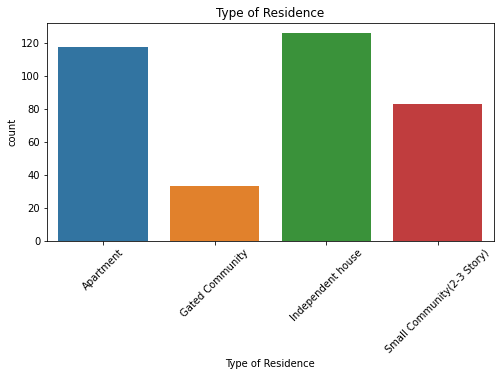

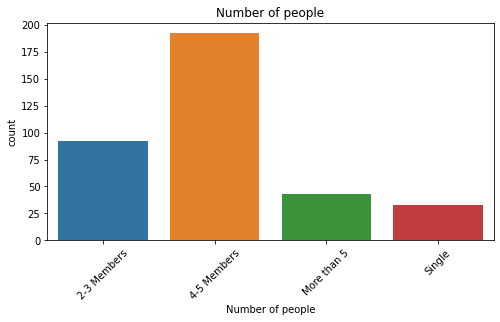

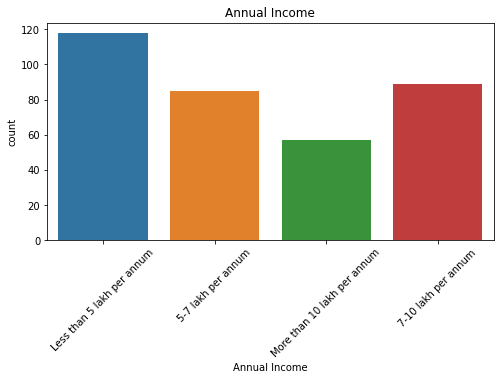

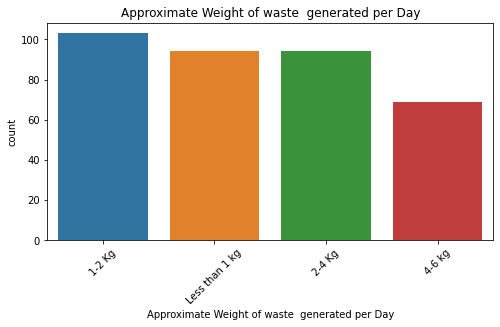

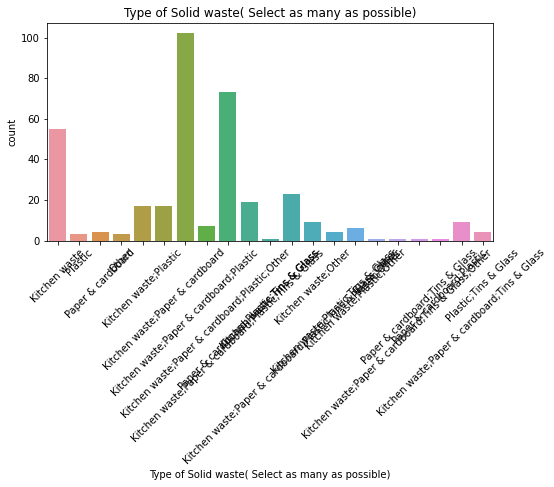

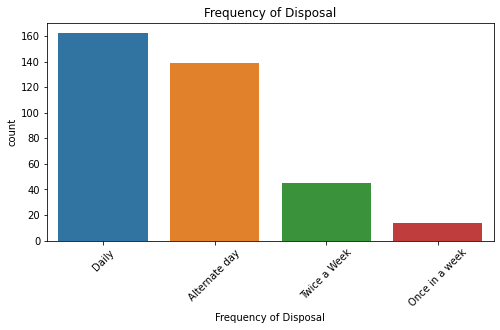

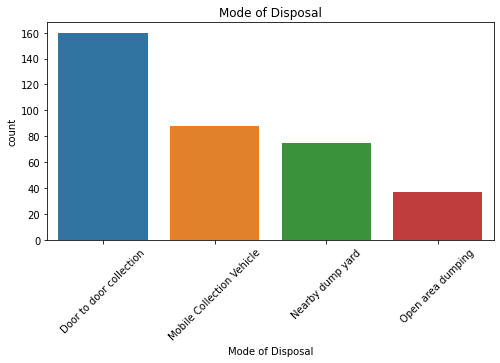

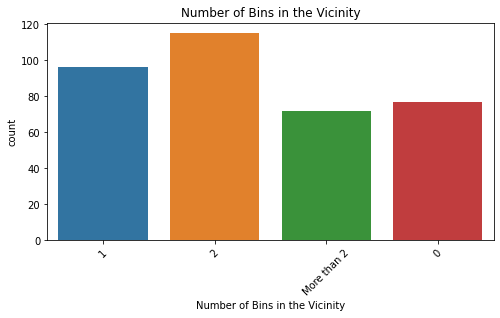

In [35]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

## Split Data

In [36]:
X=df.drop('Approximate Weight of waste  generated per Day',axis=1)
y=df['Approximate Weight of waste  generated per Day']

In [37]:
X.shape

(360, 15)

In [38]:
y.shape

(360,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.columns

Index(['Number of people', 'Annual Income', 'Number of Bins in the Vicinity',
       'Type of Residence_Apartment', 'Type of Residence_Gated Community',
       'Type of Residence_Independent house',
       'Type of Residence_Small Community(2-3 Story)',
       'Mode of Disposal_Door to door collection',
       'Mode of Disposal_Mobile Collection Vehicle',
       'Mode of Disposal_Nearby dump yard',
       'Mode of Disposal_Open area dumping',
       'Frequency of Disposal_Alternate day', 'Frequency of Disposal_Daily',
       'Frequency of Disposal_Once in a week',
       'Frequency of Disposal_Twice a Week'],
      dtype='object')

In [41]:
X_train.to_pickle("./X_train.pkl")
X_test.to_pickle("./X_test.pkl")
y_train.to_pickle("./y_train.pkl")
y_test.to_pickle("./y_test.pkl")

X.to_pickle("./X.pkl")
y.to_pickle("./y.pkl")

In [42]:
y_train

278    1
118    1
31     1
36     1
153    3
      ..
71     1
106    1
270    1
348    2
102    0
Name: Approximate Weight of waste  generated per Day, Length: 241, dtype: int64